##Dinosaur name generation
Generating dinosaur names using Natural Language Processing seems like a fun task. Inorder to do this we will use lots of dinosaur names avaliable in a dino.txt.

Then we will perform character level encoding, which is similar to word encoding but we use characters because here we are generating one name not a sentence. So character level encoding should do the job. We will create sequences out of the names and split them into x and y and train out model.

Later we look at the results and see how our model performs by predicting names starting with each alphabet.

In [72]:
!wget --no-check-certificate \
    https://raw.githubusercontent.com/raziiiuddin/ml_practice/master/learn/text_gen_dino.txt \
    -O /tmp/dino.txt

--2020-10-03 14:35:24--  https://raw.githubusercontent.com/raziiiuddin/ml_practice/master/learn/text_gen_dino.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21444 (21K) [text/plain]
Saving to: ‘/tmp/dino.txt’

/tmp/dino.txt       100%[===================>]  20.94K  --.-KB/s    in 0.01s   

2020-10-03 14:35:24 (1.64 MB/s) - ‘/tmp/dino.txt’ saved [21444/21444]



In [1]:
data = []
with open('/tmp/dino.txt','r') as text_file:
    data = text_file.read()

In [2]:
names = data.lower().split('\n')

In [3]:
names[:7]

['aachenosaurus',
 'aardonyx',
 'abdallahsaurus',
 'abelisaurus',
 'abrictosaurus',
 'abrosaurus',
 'abydosaurus']

In [4]:
names_list = []
for name in names:
    letter_list = []
    for i in range(0,len(name)):
        letter_list.append(name[i])
    # Append with \n to indicate end of the name
    letter_list.append('\n')
    names_list.append(letter_list)


In [5]:
names_list[:7]

[['a', 'a', 'c', 'h', 'e', 'n', 'o', 's', 'a', 'u', 'r', 'u', 's', '\n'],
 ['a', 'a', 'r', 'd', 'o', 'n', 'y', 'x', '\n'],
 ['a', 'b', 'd', 'a', 'l', 'l', 'a', 'h', 's', 'a', 'u', 'r', 'u', 's', '\n'],
 ['a', 'b', 'e', 'l', 'i', 's', 'a', 'u', 'r', 'u', 's', '\n'],
 ['a', 'b', 'r', 'i', 'c', 't', 'o', 's', 'a', 'u', 'r', 'u', 's', '\n'],
 ['a', 'b', 'r', 'o', 's', 'a', 'u', 'r', 'u', 's', '\n'],
 ['a', 'b', 'y', 'd', 'o', 's', 'a', 'u', 'r', 'u', 's', '\n']]

In [9]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer()
tokenizer.fit_on_texts(names_list)
word_index = tokenizer.word_index
total_words = len(word_index) + 1

print(word_index)
print(total_words)

{'a': 1, 's': 2, 'u': 3, 'o': 4, 'r': 5, '\n': 6, 'n': 7, 'i': 8, 'e': 9, 't': 10, 'l': 11, 'p': 12, 'h': 13, 'c': 14, 'g': 15, 'd': 16, 'm': 17, 'y': 18, 'b': 19, 'k': 20, 'v': 21, 'x': 22, 'z': 23, 'j': 24, 'w': 25, 'f': 26, 'q': 27}
28


In [10]:
sequences = []
for name in names_list:
    tokenized_name = tokenizer.texts_to_sequences([name])[0]
    for i in range(1, len(tokenized_name)):
        n_gram_sequence = tokenized_name[:i+1]
        sequences.append(n_gram_sequence)

max_sequence_length = max([len(x) for x in names_list])

In [11]:
sequences[:7]

[[1, 1],
 [1, 1, 14],
 [1, 1, 14, 13],
 [1, 1, 14, 13, 9],
 [1, 1, 14, 13, 9, 7],
 [1, 1, 14, 13, 9, 7, 4],
 [1, 1, 14, 13, 9, 7, 4, 2]]

In [12]:
padded = pad_sequences(sequences, maxlen=max_sequence_length,padding="pre")

In [13]:
padded[:7]

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  1,  1, 14],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  1,  1, 14, 13],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  1,  1, 14, 13,  9],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  1,  1, 14, 13,  9,  7],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  1,  1, 14, 13,  9,  7,  4],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  1,  1, 14, 13,  9,  7,  4,  2]], dtype=int32)

In [14]:
xs, labels = padded[:,:-1], padded[:,-1]
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [15]:
print(xs[0])
print(ys[0])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [16]:
model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(total_words, 64, input_length=max_sequence_length-1),# -1 because we separated x and y
                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
                             tf.keras.layers.Dense(total_words, activation="softmax")
])
model.summary()
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 26, 64)            1792      
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                24832     
_________________________________________________________________
dense (Dense)                (None, 28)                1820      
Total params: 28,444
Trainable params: 28,444
Non-trainable params: 0
_________________________________________________________________


In [17]:
history = model.fit(xs,ys,epochs=50)

Epoch 1/50
575/575 [==============================] - 10s 17ms/step - loss: 2.3420 - accuracy: 0.3096
Epoch 2/50
575/575 [==============================] - 10s 17ms/step - loss: 1.8727 - accuracy: 0.4411
Epoch 3/50
575/575 [==============================] - 10s 17ms/step - loss: 1.7733 - accuracy: 0.4635
Epoch 4/50
575/575 [==============================] - 10s 18ms/step - loss: 1.7221 - accuracy: 0.4752
Epoch 5/50
575/575 [==============================] - 10s 17ms/step - loss: 1.6863 - accuracy: 0.4894
Epoch 6/50
575/575 [==============================] - 10s 18ms/step - loss: 1.6547 - accuracy: 0.5010
Epoch 7/50
575/575 [==============================] - 10s 17ms/step - loss: 1.6263 - accuracy: 0.5116
Epoch 8/50
575/575 [==============================] - 10s 18ms/step - loss: 1.6030 - accuracy: 0.5179
Epoch 9/50
575/575 [==============================] - 10s 18ms/step - loss: 1.5806 - accuracy: 0.5260
Epoch 10/50
575/575 [==============================] - 10s 18ms/step - loss: 1.563

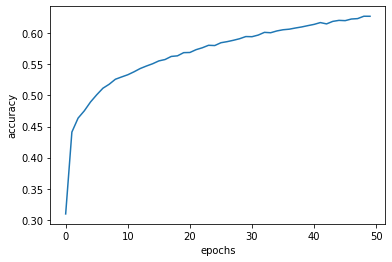

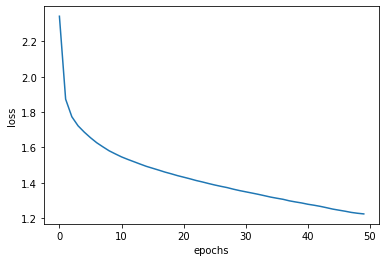

In [18]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.xlabel("epochs")
    plt.ylabel(string)
    plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [69]:
def generate_dino_name(dino_name):
    for _ in range(next_word):
        token_list = tokenizer.texts_to_sequences([dino_name])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_length, padding="pre")
        predicted = model.predict_classes(token_list, verbose=0)
        output_letter=""
        for word, index in tokenizer.word_index.items():
            if index == predicted:
                output_letter = word
                break
        if output_letter == "\n":
            break
        dino_name += " " + output_letter
    return dino_name.replace(" ","")

In [70]:

alphabets = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
dino_output_list = []
for alphabet in alphabets:
    generated = generate_dino_name(alphabet)
    #generated = generate_dino_name(alphabet+" e")
    dino_output_list.append(generated)

In [71]:
dino_output_list

['altosaurus',
 'barachylosaurus',
 'changangosaurus',
 'dalamosaurus',
 'europosaurus',
 'furutitan',
 'ganganosaurus',
 'hangangosaurus',
 'igantosaurus',
 'jiangshanosaurus',
 'katanosaurus',
 'langanosaurus',
 'marchanosaurus',
 'nangansaurus',
 'ornithodon',
 'palaeosaurus',
 'qing',
 'riobelosaurus',
 'sinosaurus',
 'tanasaurus',
 'uanasaurus',
 'velosaurus',
 'walbertaptor',
 'xiang',
 'yurosaurus',
 'zunangosaurus']